"RMS Titanic (/taɪˈtænɪk/) was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City." Titanic was the largest ship afloat at the time it entered service and was one of three Olympic class ocean liners operated by the White Star Line. The ship carried 2,224 passengers and crew aboard. "Titanic only carried enough lifeboats for 1,178 people—slightly more than half of the number on board, and one third of her total capacity." Titanic left Southampton and made two stops before heading west to New York. It stopped at Cherbourg, France then at Queenstown, Ireland. [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)

We have a sample of 891 of the 2,224 passengers and crew aboard. The sample was obtained from [the Kaggle website](https://www.kaggle.com/c/titanic/data). In this project the data is going to be analysed and some questiones are going to be asked and answered. Discription of the data was obtained from [the Kaggle website](https://www.kaggle.com/c/titanic/data) and will be gived before we ask the questions.

# Data Dictionary

|**Variable** | **Definition** | **Key**|
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd|
| sex | Sex | |
| Age | Age in years | |
| sibsp	| # of siblings / spouses aboard the Titanic | |
| parch	| # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin	| Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


# Variable Notes

pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

# Questions:
1. what is the ratio of survivals/non-survivals?
2. How many people ported from each of the three Ports?
3. How many people survived from each port?
4. How many people were in each Ticket class?
5. How many people survived from each Ticket class?
6. Is there a relationship between survival and Ticket class?
6. Is there a relationship between survival and sex?
8. Is there a relationship between survival and age?
9. Is there a relationship between survival and having a sibling/spouse/parent/child aboard the Titanic?

Source Declarations:  
These are the websites and sample code used for completing this project, or was inspired by to complete this project  
[matplotlib documentations and sample code](http://matplotlib.org/api/pyplot_api.html)  
[Udacity](https://www.udacity.com)  
[Pandas documentations](http://pandas.pydata.org/pandas-docs/stable/index.html)  
[Show DataFrame as table in iPython Notebook](http://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook)  
[Is there a way to perform “if” in python's lambda](http://stackoverflow.com/questions/1585322/is-there-a-way-to-perform-if-in-pythons-lambda)

** *Importing the necessary libraries that are used in the code* **

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

** *Reading in the data file into a Panda DataFrame* **

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

** *Printing 5 lines from the DataFrame to take a look at the data* **

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** *Checking the data for problems* **

Survived set([0, 1])
Pclass set([1, 2, 3])
Sex set(['male', 'female'])
SibSp set([0, 1, 2, 3, 4, 5, 8])
Parch set([0, 1, 2, 3, 4, 5, 6])
Embarked set(['Q', nan, 'S', 'C'])
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Count of data avialable
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


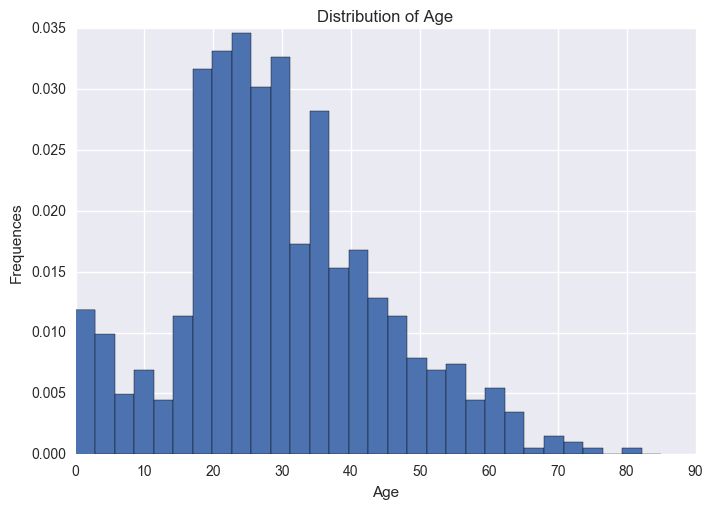

In [4]:
# We are not going to use Name, Ticket, Fare, and Cabin columns so we are not going to check them
survived = set(titanic_df['Survived'])
print 'Survived', survived
pClass = set(titanic_df['Pclass'])
print 'Pclass', pClass
sex = set(titanic_df['Sex'])
print 'Sex', sex
sibSp = set(titanic_df['SibSp'])
print 'SibSp', sibSp
parch = set(titanic_df['Parch'])
print 'Parch', parch
embarked = set(titanic_df['Embarked'])
print 'Embarked', embarked

print titanic_df['Age'].describe()

print '\nCount of data avialable\n', titanic_df.count()
plt.hist(titanic_df['Age'].dropna(), bins= 30, range = (0, 85), normed=1)

plt.ylabel('Frequences')
plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

** All data looks good, but we noticed some missing informations in some rows. For example "Age" has only 714 records out of 891 but that's fine. We are not going to clean the dataset by deleting the records that has missing information but we are going to ignore them when applicable. ** 

In [5]:
# we are changing the name of 'PassengerId' column to 'Number of people' using DataFrame.rename
titanic_df.rename(columns={'PassengerId': 'Number of people'}, inplace=True)

# we are changing all the values of the 'Number of people' column to '1' using apply()
titanic_df['Number of people'] = titanic_df['Number of people'].apply(lambda x: 1)

In [6]:
def age_range(age):
    '''
    Usage:
    takes an int "age" and return what range that age is in.
    return a string.
    '''
    if age <= 18:
        return 'Child'
    elif age > 18 and age < 65:
        return 'Adult'
    elif age >= 65:
        return 'Senior'
    else:
        return None

def get_sex(sex):
    '''
    Usage:
    takes a string "sex" and return an int representation.
    return 1 for female and 0 for male.
    '''
    if sex == 'female':
        return 1
    elif sex == 'male':
        return 0
    else:
        return None

# We are adding some new columns to the DataFrame to use them later in our code
titanic_df['Gender'] = titanic_df['Sex'].apply(get_sex) #using apply(get_sex) to add the Gender column to the DataFrame
titanic_df['Age range'] = titanic_df['Age'].apply(age_range) #using apply(age_range) to add the Age range column to the DataFrame

In [7]:
def correlation(x, y):
    '''
    Usage:
    Calculate the correlation bewteen two variables
    the closer the result to -1 or 1 the stronger the correlation between the two variables
    the closer the result to 0 the weaker the correlation between the two variables
    returns a float between -1 and 1.
    '''
    a = ((x - x.mean()) / x.std(ddof=0))
    b = (y - y.mean()) / y.std(ddof=0)
    c = a * b
    return c.values.mean()

def survivals_and_non_survivals(df):
    '''
    Usage:
    split the dataframe into survivals and non-survivals
    returns the two dataframes as a tuple
    '''
    return df[df['Survived'] == 1], df[df['Survived'] == 0]

# Now we are going to answer each of the questions   
### Q1. what is the ratio of survivals/non-survivals?

Total Count:  891.0
Survivals Count: 342.0
Non-Survivals Count: 549.0
So the ratio of survivals/non-survivals is: 1.60526315789


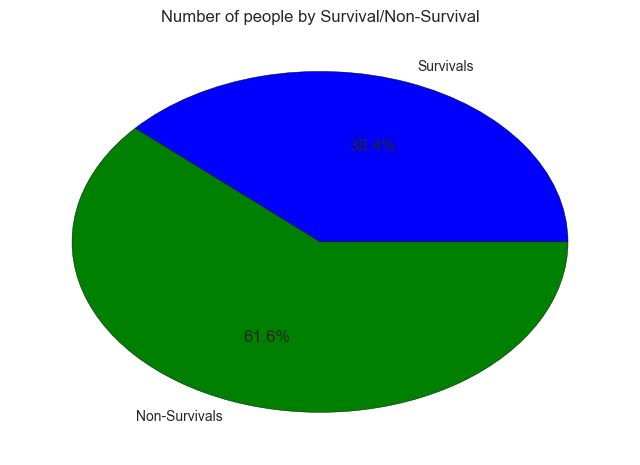

In [8]:
# we are spliting the dataframe into survivals and non-survivals using survivals_and_non_survivals().
# then we are getting their length and comparing them to each other.
survival_count, non_survival_count = survivals_and_non_survivals(titanic_df)
survival_count = float(len(survival_count))
non_survival_count = float(len(non_survival_count))
print 'Total Count: ', (survival_count + non_survival_count) # making sure the data add up to the right size
print 'Survivals Count:', survival_count
print 'Non-Survivals Count:', non_survival_count
print 'So the ratio of survivals/non-survivals is:', (non_survival_count / survival_count)

# we are ploting a pie chart to understand the data better.
plt.pie([survival_count, non_survival_count], labels = ['Survivals', 'Non-Survivals'], autopct='%1.1f%%')
plt.title('Number of people by Survival/Non-Survival')
plt.show()

This means that for every **5 survivals** there are about **8 non-survivals**

In [9]:
def count_group(variable):
  """
  Usage:
  Grouping the dataframe by the variable/s passed
  return the group count of the dataframe
  """
  return titanic_df.groupby(variable, as_index=False)['Number of people'].count()

### Q2. How many people ported from each of the three Ports?

C = Cherbourg, Q = Queenstown, S = Southampton



,Embarked,Number of people
0,C,168
1,Q,77
2,S,644


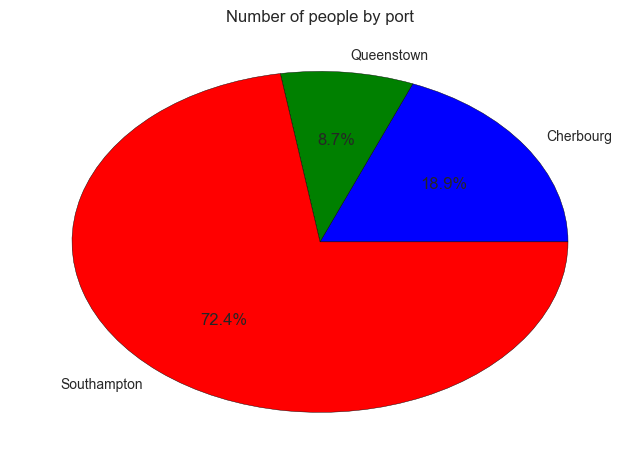

In [10]:
# we are using the count_group() function to get the count of people from each Port
embarked_df = count_group('Embarked')
print 'C = Cherbourg, Q = Queenstown, S = Southampton\n'
display(embarked_df)

plt.pie(embarked_df['Number of people'], labels = ['Cherbourg', 'Queenstown', 'Southampton'], autopct='%1.1f%%')
plt.title('Number of people by port')
plt.show()

We see that most people ported from Southampton and they were almost triple the number of people ported from both Cherbourg and Queenstown.  

### Q3. How many people survived from each port?

In [11]:
# we are using the count_group() function to get the count of people from each Port and their survival
port_survival = count_group(['Embarked', 'Survived'])
survivals = port_survival[port_survival['Survived'] == 1]
print 'C = Cherbourg, Q = Queenstown, S = Southampton\n'
display(survivals)

C = Cherbourg, Q = Queenstown, S = Southampton



,Embarked,Survived,Number of people
1,C,1,93
3,Q,1,30
5,S,1,217


When adding the number of survivals from all ports, we see that they add up to 340 survivals. This means, there are two people who survived but we don't know from where they ported. Since we saw before that there were 341 survivals.

### Q4. How many people were in each Ticket class?

In [12]:
# we are using the count_group() function to get the count of people from each Ticket class
pClass_survival_df = count_group('Pclass')

print 'Pclass:  1 = 1st, 2 = 2nd, 3 = 3rd'
display(pClass_survival_df)

Pclass:  1 = 1st, 2 = 2nd, 3 = 3rd


,Pclass,Number of people
0,1,216
1,2,184
2,3,491


### Q5. How many people survived from each Ticket class?

Pclass:  1 = 1st, 2 = 2nd, 3 = 3rd
Survived:  0 = No, 1 = Yes



Number of people     
Survived                0    1
Pclass                        
1                      80  136
2                      97   87
3                     372  119

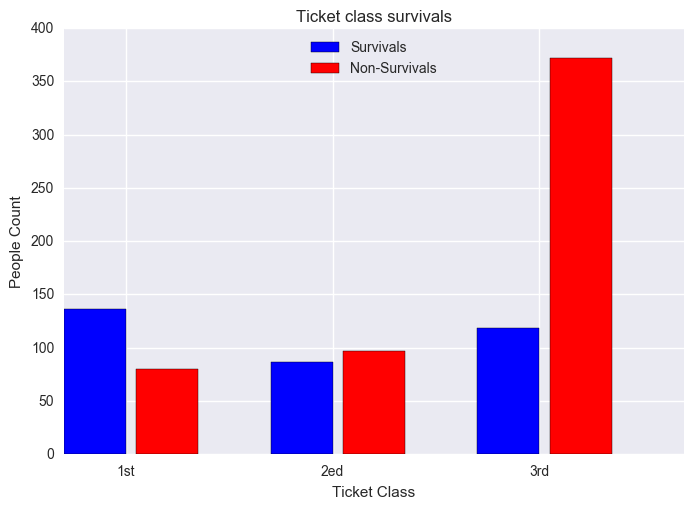

In [13]:
# we are using the count_group() function to get the count of people from each Ticket class and their survival
class_survival_df = count_group(['Pclass', 'Survived'])
print 'Pclass:  1 = 1st, 2 = 2nd, 3 = 3rd'
print 'Survived:  0 = No, 1 = Yes\n'
display(class_survival_df.pivot_table(index='Pclass', columns='Survived'))

# Spliting the class_survival_df into survivals and non-survivals using survivals_and_non_survivals() function
survivals, non_survivals = survivals_and_non_survivals(class_survival_df)

left1 = [1, 2, 3]
left2 = [1.35, 2.35, 3.35]

# ploting survivals and non_survivals for comparison
p1=plt.bar(left1, survivals['Number of people'], color='b', width=0.3)
p2=plt.bar(left2, non_survivals['Number of people'], color='r', width=0.3)

# adding x,y lables and title and more details to the plot
plt.ylabel('People Count')
plt.xlabel('Ticket Class')
plt.title('Ticket class survivals')
plt.xticks([1.3, 2.3, 3.3], ['1st', '2ed', '3rd'])
plt.legend((p1[0], p2[0]), ('Survivals', 'Non-Survivals'), loc=9)

plt.show()

### Q6. Is there a relationship between survival and Ticket class?

In [14]:
# using the correlation() function to get the correlation between Pclass and Survived data columns
correlation(titanic_df['Pclass'], titanic_df['Survived'])

-0.3384810359610152

This means there is a some relationship between **Survival** and **Ticket class**  
The higher the class ticket a passenger had the better chance of survival the person had.  
We see that for every 5 people survived in 1st class there were 3 who died in 1st class and the ratio is survived/died = 0.59.  
However, that is not the case for 3rd class. For every 1 person survived in 3rd class there were 3 who died in 3rd class and the ratio is survived/died = 0.32.

### Q7. Is there a relationship between survival and sex?

Survived:  0 = No, 1 = Yes



Number of people     
Survived                0    1
Sex                           
female                 81  233
male                  468  109

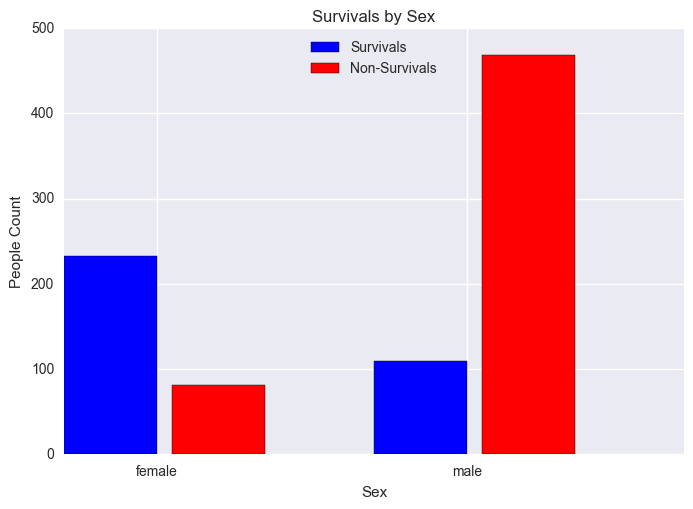

In [15]:
# we are using the count_group() function to get the count of (female and male) and their survival
sex_survival_df = count_group(['Sex', 'Survived'])

# Spliting the sex_survival_df into survivals and non-survivals using survivals_and_non_survivals() function
survivals, non_survivals = survivals_and_non_survivals(sex_survival_df)

# ploting survivals and non_survivals for comparison
p1=plt.bar([1, 2], survivals['Number of people'], color='b', width=0.3)
p2=plt.bar([1.35, 2.35], non_survivals['Number of people'], color='r', width=0.3)

plt.ylabel('People Count')
plt.xlabel('Sex')
plt.title('Survivals by Sex')
plt.xticks([1.3, 2.3], survivals['Sex'])
plt.legend((p1[0], p2[0]), ('Survivals', 'Non-Survivals'), loc=9)

print 'Survived:  0 = No, 1 = Yes\n'
display(sex_survival_df.pivot_table(index='Sex', columns='Survived'))
plt.show()


In [16]:
# using the correlation() function to get the correlation between Gender and Survived data columns
correlation(titanic_df['Gender'], titanic_df['Survived'])

0.54335138065775523

This means there is a relationship between **Survival** and **Sex**  
More femals have survived than males and the ratio of survived/died for female is 2.88, which means for every 3 female survivals there were 1 female who died. However, the ratio for males is 0.23, which means for every 1 male survival there were 4 males who died.  

### Q8. Is there a relationship between survival and age?

Survived:  0 = No, 1 = Yes



Number of people     
Survived                 0    1
Age range                      
Adult                  345  219
Child                   69   70
Senior                  10    1

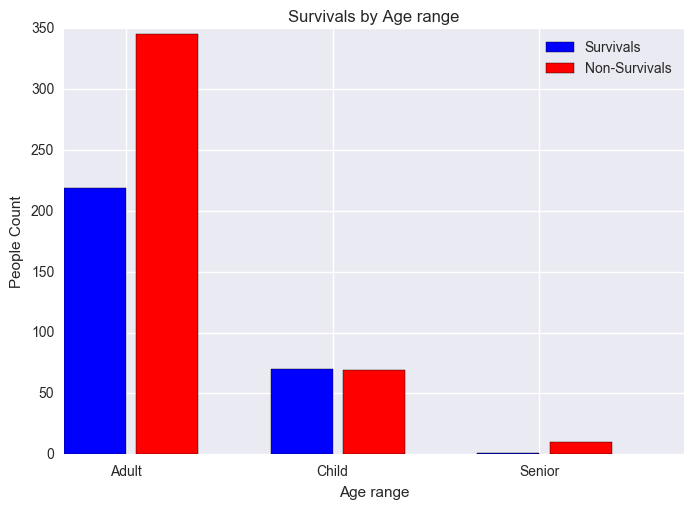

In [17]:
# we are using the count_group() function to get the count of Age range and survival
age_range_survival_df = count_group(['Age range', 'Survived'])

# Spliting the sex_survival_df into survivals and non-survivals using survivals_and_non_survivals() function
survivals, non_survivals = survivals_and_non_survivals(age_range_survival_df)

# ploting survivals and non_survivals for comparison
p1=plt.bar(left1, survivals['Number of people'], color='b', width=0.3)
p2=plt.bar(left2, non_survivals['Number of people'], color='r', width=0.3)

plt.ylabel('People Count')
plt.xlabel('Age range')
plt.title('Survivals by Age range')
plt.xticks([1.3, 2.3, 3.3], survivals['Age range'])
plt.legend((p1[0], p2[0]), ('Survivals', 'Non-Survivals'))

print 'Survived:  0 = No, 1 = Yes\n'
display(age_range_survival_df.pivot_table(index='Age range', columns='Survived'))
plt.show()


In [18]:
# making a temp dataframe that has only the Age and Survived columns
# we are using the Pandas concat() to concatenate the two columns
temp_df = pd.concat([titanic_df['Age'], titanic_df['Survived']], axis=1)

temp_df.dropna(inplace=True) # Droping the rows where we are missing data "nan"

# using the correlation() function to get the correlation between Age and Survived data columns
correlation(temp_df['Age'], temp_df['Survived'])

-0.077221094572177656

This means there is almost no relationship between **Age** and **Survival**  

### Q9. Is there a relationship between survival and having a sibling/spouse/parent/child aboard the Titanic?

In [19]:
# we are adding a new column to the dataframe for family and we are adding the SibSp and Parch columns to get the new column
titanic_df['family'] = titanic_df['SibSp'] + titanic_df['Parch']

# we are changing the values of the family column to 1 if the person has at least one family member and 0 if they don't
titanic_df['family'] = titanic_df['family'].apply(lambda x: 1 if x > 0 else 0)

# using the correlation() function to get the correlation between family and Survived data columns
print correlation(titanic_df['family'], titanic_df['Survived'])

0.2033670857


This means there is some relationship between **survival** and **having a sibling/spouse/parent/child aboard the Titanic**

# Conclusion:
After finishing the data analisist on the Titanic Data we noticed/discovered few things. First, female had more chance of seervivals than male. People who had a 1st Ticket class had a better survival/death ratio that people who had a 3rd Ticket class. Also, we saw that having a family member abroad slightly increased the chances of servival. Second, we saw that about 72.4% of people ported from Southampton, which was the first port the Titanic left. Third, we saw that the age distribution was positively-skewed and most people where between the ages of 17 to 37.  

We had some missing Data, especially age data; We had 714 age records out of 891. This missing data could have effected the age findings if the missing ages are high or low, meaning, if most of the missing age records were records of seniors then the missing data had an effect. We would have a better understaning of the data if we didn't have any missing data.